In [3]:
%load_ext autoreload
%autoreload 2

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ghibtools as gh
from compute_global_dataframes import relaxation_concat_job, hrv_concat_job, resp_features_concat_job, rsa_concat_job, bmrq_concat_job
from configuration import *
from params import *

# MUSIC SCORING

In [22]:
concat = []
for participant in subject_keys:
    ses01_folder = base_folder / 'Raw_Data' / f'{participant}' / 'questionnaires' / 'ses01'
    df_participant = pd.read_excel(ses01_folder /  f'cotations_musiques_relatives_{participant}_bis.xlsx', index_col = 0)
    concat.append(df_participant)
cotations_relatives_musiques = pd.concat(concat)

In [50]:
cotations_relatives_musiques['tempo'] = cotations_relatives_musiques['musique_num'].map(tempos)
cotations_relatives_musiques['music_name'] = cotations_relatives_musiques['musique_num'].map(music_mapper)

<AxesSubplot: xlabel='music_name'>

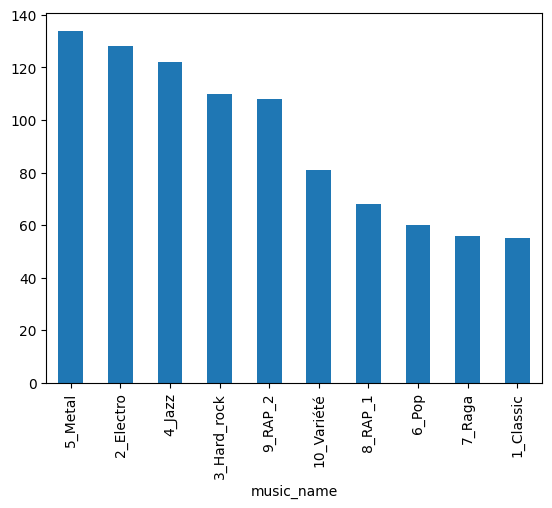

In [53]:
cotations_relatives_musiques.groupby('music_name')['tempo'].mean().sort_values(ascending = False).plot.bar()

Text(0.5, 1.0, 'Cotations des musiques (N = 90)')

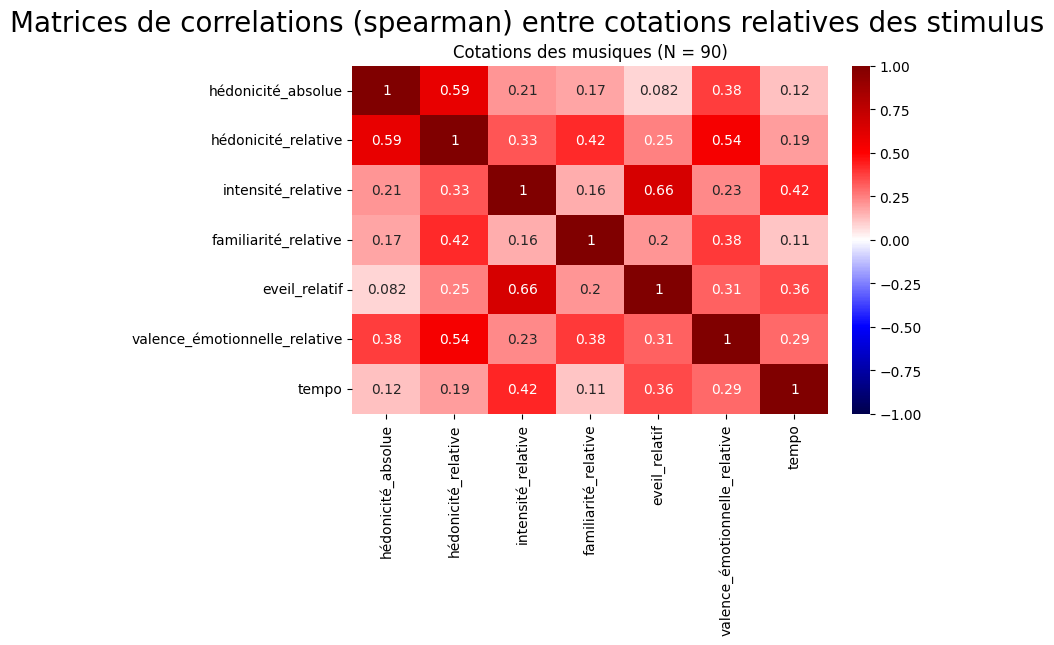

In [24]:
metrics = ['hédonicité_absolue','hédonicité_relative','intensité_relative','familiarité_relative','eveil_relatif','valence_émotionnelle_relative','tempo']
corr_method = 'spearman'

fig, ax = plt.subplots(figsize = (8,6), constrained_layout = True)
fig.suptitle(f'Matrices de correlations ({corr_method}) entre cotations relatives des stimulus', fontsize = 20, y = 1.05)

N = cotations_relatives_musiques.shape[0]
sns.heatmap(cotations_relatives_musiques.loc[:,metrics].corr(corr_method,numeric_only = True), cmap = 'seismic', vmin = -1, vmax =1, annot = True, ax=ax)
ax.set_title(f'Cotations des musiques (N = {N})')

# file = save_folder / f'matrice_correlation_{corr_method}.png'
# fig.savefig(file, bbox_inches = 'tight')


<AxesSubplot: title={'center': 'Correlation : 0.293, R² : nan, pval : ns'}, xlabel='tempo', ylabel='valence_émotionnelle_relative'>

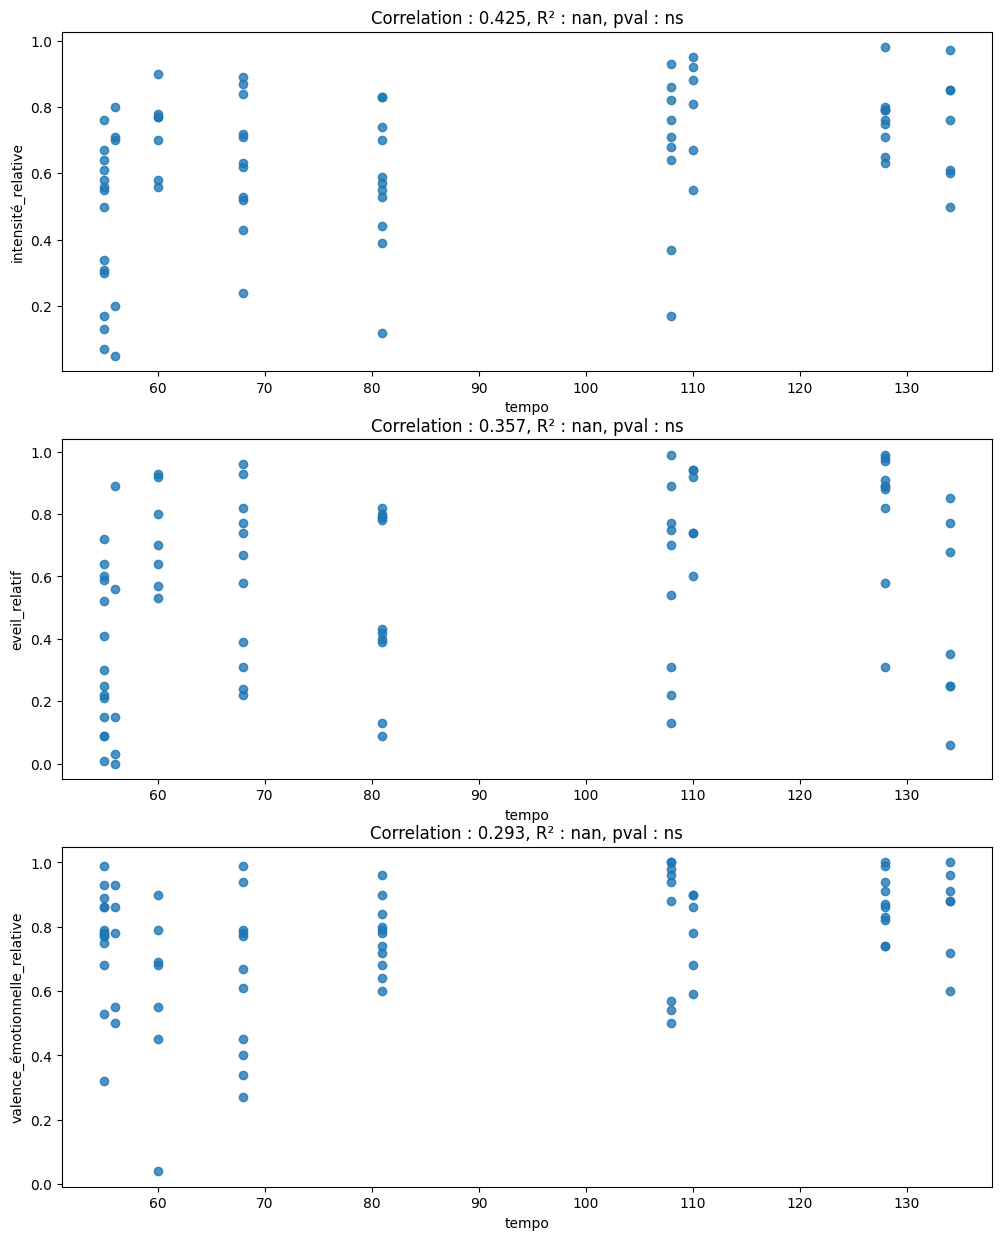

In [25]:
fig, axs = plt.subplots(nrows = 3, figsize = (12,15))
ax = axs[0]
gh.stats_quantitative(df = cotations_relatives_musiques, xlabel = 'tempo', ylabel = 'intensité_relative', ax=ax)
ax = axs[1]
gh.stats_quantitative(df = cotations_relatives_musiques, xlabel = 'tempo', ylabel = 'eveil_relatif', ax=ax)
ax = axs[2]
gh.stats_quantitative(df = cotations_relatives_musiques, xlabel = 'tempo', ylabel = 'valence_émotionnelle_relative', ax=ax)

In [54]:
music_features = pd.DataFrame({'participant':chosen_musics.keys(),'chosen_music':chosen_musics.values()})
music_features['tempo'] = music_features['chosen_music'].map(tempos)
music_features

,participant,chosen_music,tempo
0,P01,10,81
1,P02,10,81
2,P03,10,81
3,P04,3,110
4,P05,9,108
5,P06,4,122
6,P07,7,56
7,P08,10,81
8,P09,9,108
9,P10,9,108


In [109]:
(music_features['tempo'] < 100).value_counts()

tempo
True     17
False    13
Name: count, dtype: int64

In [113]:
music_features.set_index('chosen_music')['tempo'] < 100

chosen_music
10     True
10     True
10     True
3     False
9     False
4     False
7      True
10     True
9     False
9     False
10     True
10     True
9     False
7      True
8      True
10     True
10     True
8      True
10     True
5     False
10     True
8      True
6      True
5     False
9     False
9     False
9     False
9     False
5     False
10     True
Name: tempo, dtype: bool

In [115]:
music_features['speed'] = np.nan
music_features['speed'] = music_features['tempo'] < 100
music_features['speed'] = music_features['speed'].map({True:'slow',False:'fast'})
music_features

,participant,chosen_music,tempo,BMRQ,speed
0,P01,10,81,2.727273,slow
1,P02,10,81,3.000000,slow
2,P03,10,81,3.136364,slow
3,P04,3,110,3.227273,fast
4,P05,9,108,3.227273,fast
5,P06,4,122,3.045455,fast
6,P07,7,56,3.000000,slow
7,P08,10,81,2.590909,slow
8,P09,9,108,2.818182,fast
9,P10,9,108,3.045455,fast


<AxesSubplot: ylabel='Frequency'>

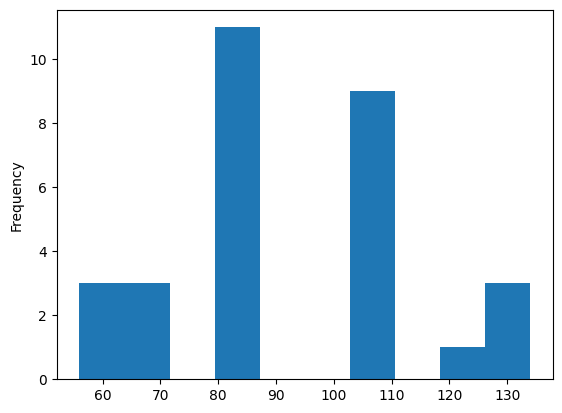

In [110]:
music_features['tempo'].plot.hist()

<AxesSubplot: xlabel='tempo'>

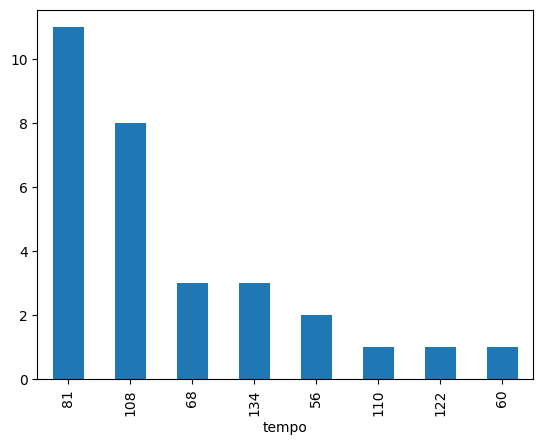

In [107]:
music_features['tempo'].value_counts().plot.bar()

In [66]:
bmrq = bmrq_concat_job.get(global_key).to_dataframe()

In [76]:
music_features['BMRQ'] = music_features['participant'].map(bmrq[['participant','BMRQ']].set_index('participant').to_dict()['BMRQ'])

<AxesSubplot: title={'center': 'Correlation : 0.218, R² : 0.021, pval : ns'}, xlabel='BMRQ', ylabel='tempo'>

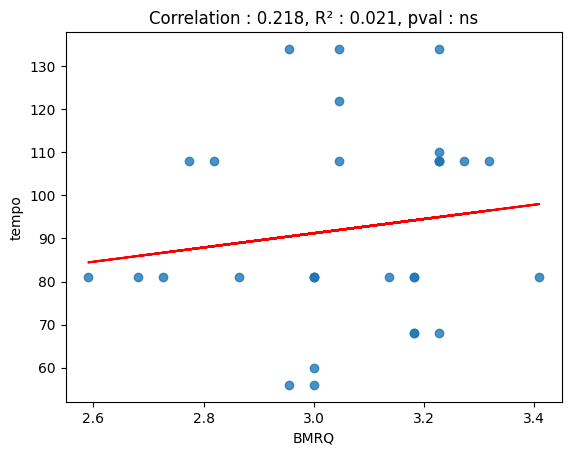

In [78]:
gh.stats_quantitative(df = music_features, xlabel = 'BMRQ', ylabel = 'tempo')

# TEMPO ON RESPI

In [116]:
resp = resp_features_concat_job.get(global_key).to_dataframe().groupby(['participant','session']).median(True).reset_index()
resp = resp.query("session == 'music'")
resp['tempo'] = resp['participant'].map(music_features[['participant','tempo']].set_index('participant').to_dict()['tempo'])
resp['speed'] = resp['participant'].map(music_features[['participant','speed']].set_index('participant').to_dict()['speed'])
resp.head(5)

,participant,session,inspi_index,expi_index,next_inspi_index,inspi_time,expi_time,next_inspi_time,cycle_duration,inspi_duration,...,expi_amplitude,total_volume,artifact,stai_state,stai_trait,Maia_Mean,OAS,BMRQ,tempo,speed
1,P01,music,300864.0,301826.5,303446.0,300.8640,301.8265,303.4460,2.8435,0.9650,...,31.742696,69.078041,0.0,40.0,61.0,1.019643,2.666667,2.727273,81,slow
4,P02,music,279438.0,280774.0,282702.5,279.4380,280.7740,282.7025,3.6515,1.4575,...,108.345036,218.460358,0.0,24.0,37.0,3.354762,3.066667,3.000000,81,slow
7,P03,music,333286.0,334605.0,336552.0,333.2860,334.6050,336.5520,3.4750,1.2390,...,250.399121,284.263225,0.0,20.0,24.0,3.664583,3.266667,3.136364,81,slow
10,P04,music,298824.5,299891.0,301914.0,298.8245,299.8910,301.9140,2.9295,1.0330,...,187.384160,263.028225,0.0,27.0,33.0,3.196429,3.000000,3.227273,110,fast
13,P05,music,285961.0,287834.0,290457.0,285.9610,287.8340,290.4570,4.4720,1.5820,...,41.614774,133.770157,0.0,27.0,21.0,4.107738,3.200000,3.227273,108,fast


In [84]:
resp.columns

Index(['participant', 'session', 'inspi_index', 'expi_index',
       'next_inspi_index', 'inspi_time', 'expi_time', 'next_inspi_time',
       'cycle_duration', 'inspi_duration', 'expi_duration', 'cycle_freq',
       'cycle_ratio', 'inspi_volume', 'expi_volume', 'total_amplitude',
       'inspi_amplitude', 'expi_amplitude', 'total_volume', 'artifact',
       'stai_state', 'stai_trait', 'Maia_Mean', 'OAS', 'BMRQ', 'tempo'],
      dtype='object')

<AxesSubplot: >

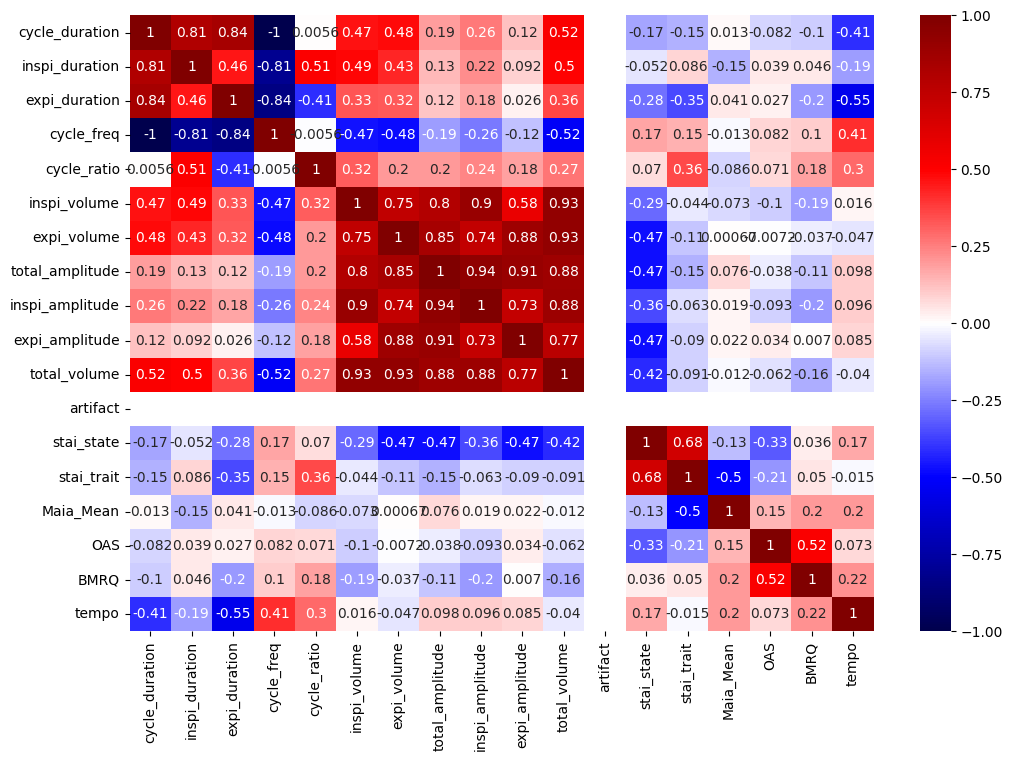

In [86]:
cols = ['cycle_duration', 'inspi_duration', 'expi_duration', 'cycle_freq',
       'cycle_ratio', 'inspi_volume', 'expi_volume', 'total_amplitude',
       'inspi_amplitude', 'expi_amplitude', 'total_volume', 'artifact',
       'stai_state', 'stai_trait', 'Maia_Mean', 'OAS', 'BMRQ', 'tempo']

fig, ax=  plt.subplots(figsize = (12,8))
sns.heatmap(resp[cols].corr(numeric_only = True, method = 'spearman'), cmap = 'seismic', annot = True, vmin = -1, vmax = 1, ax=ax)

<AxesSubplot: title={'center': 'Correlation : 0.412, R² : 0.179, pval : *'}, xlabel='tempo', ylabel='cycle_freq'>

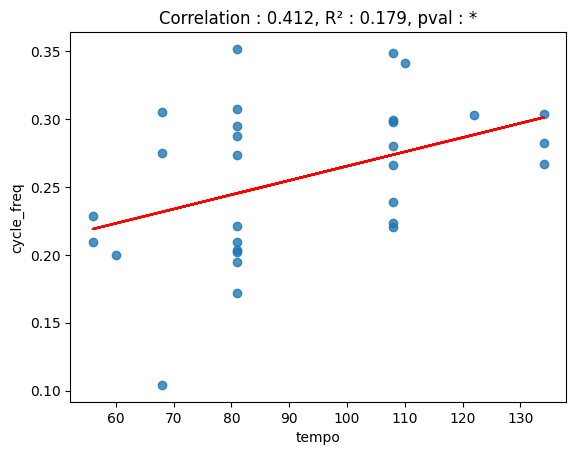

In [87]:
gh.stats_quantitative(df = resp, xlabel = 'tempo', ylabel = 'cycle_freq')

<AxesSubplot: title={'center': 'Effect of speed on cycle_freq : * \n N = 17 values/group \n t-test_ind : p = 0.023, cohen-d : 0.838 (L)'}, xlabel='speed', ylabel='cycle_freq'>

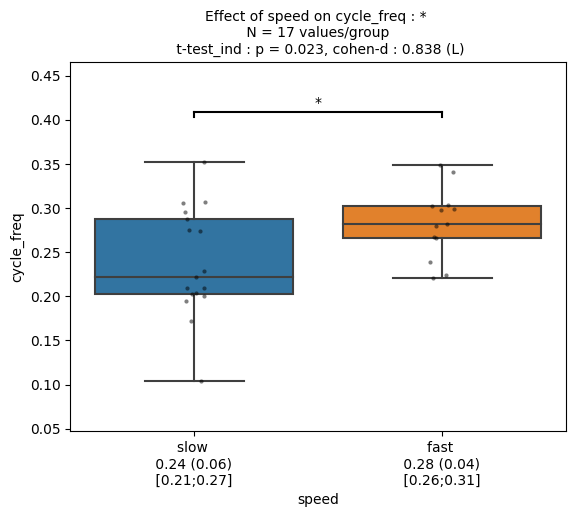

In [117]:
gh.auto_stats(df = resp, predictor = 'speed', outcome = 'cycle_freq', design = 'between')

# TEMPO ON HRV

In [118]:
hrv = hrv_concat_job.get(global_key).to_dataframe()
hrv = hrv.query("session == 'music'")
hrv['tempo'] = hrv['participant'].map(music_features[['participant','tempo']].set_index('participant').to_dict()['tempo'])
hrv['speed'] = hrv['participant'].map(music_features[['participant','speed']].set_index('participant').to_dict()['speed'])

In [103]:
hrv.columns

Index(['participant', 'session', 'HRV_Mean', 'HRV_SD', 'HRV_Median', 'HRV_Mad',
       'HRV_CV', 'HRV_MCV', 'HRV_Asymmetry', 'HRV_RMSSD', 'stai_state',
       'stai_trait', 'Gender', 'Maia_Mean', 'OAS', 'BMRQ', 'tempo'],
      dtype='object')

<AxesSubplot: >

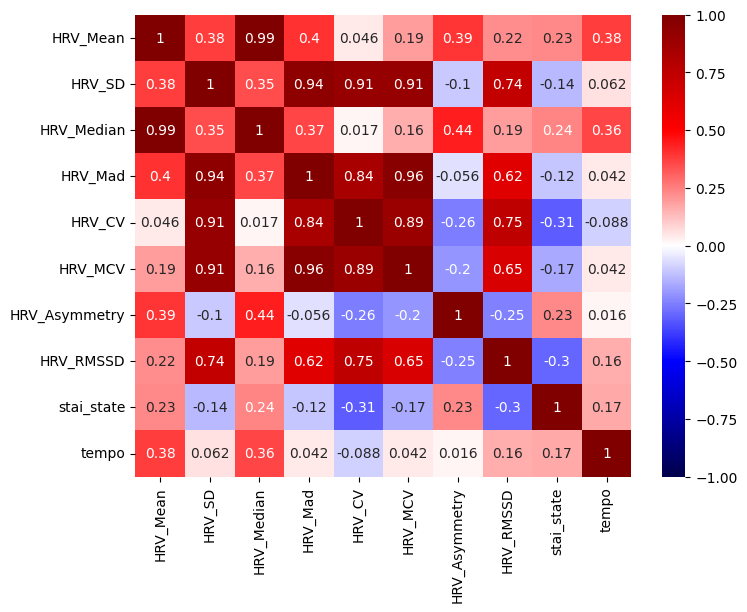

In [104]:
cols = ['HRV_Mean', 'HRV_SD', 'HRV_Median', 'HRV_Mad',
       'HRV_CV', 'HRV_MCV', 'HRV_Asymmetry', 'HRV_RMSSD', 'stai_state','tempo']

fig, ax=  plt.subplots(figsize = (8,6))
sns.heatmap(hrv[cols].corr(numeric_only = True, method = 'spearman'), cmap = 'seismic', annot = True, vmin = -1, vmax = 1, ax=ax)

<AxesSubplot: title={'center': 'Correlation : 0.359, R² : 0.165, pval : *'}, xlabel='tempo', ylabel='HRV_Median'>

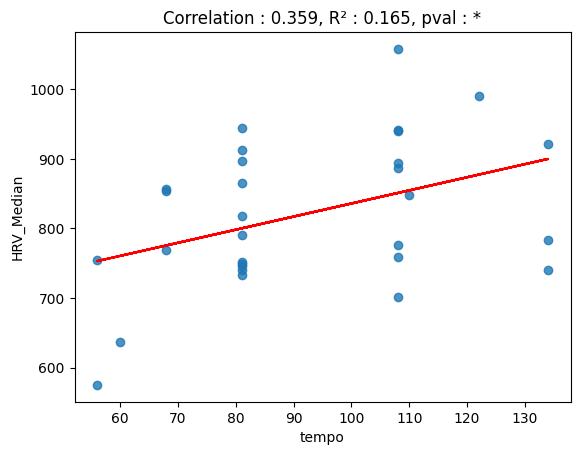

In [105]:
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Median')

<AxesSubplot: title={'center': 'Correlation : 0.042, R² : 0.001, pval : ns'}, xlabel='tempo', ylabel='HRV_Mad'>

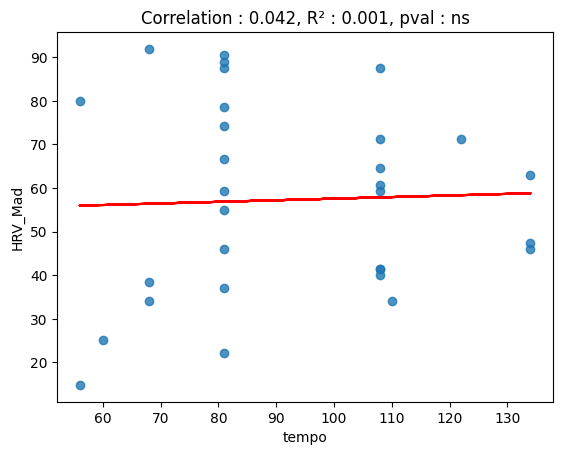

In [90]:
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Mad')

In [ ]:
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Mad')

<AxesSubplot: title={'center': 'Effect of speed on HRV_Mad : ns \n N = 17 values/group \n Mann-Whitney : p = 0.802, CLES : 0.471 (S)'}, xlabel='speed', ylabel='HRV_Mad'>

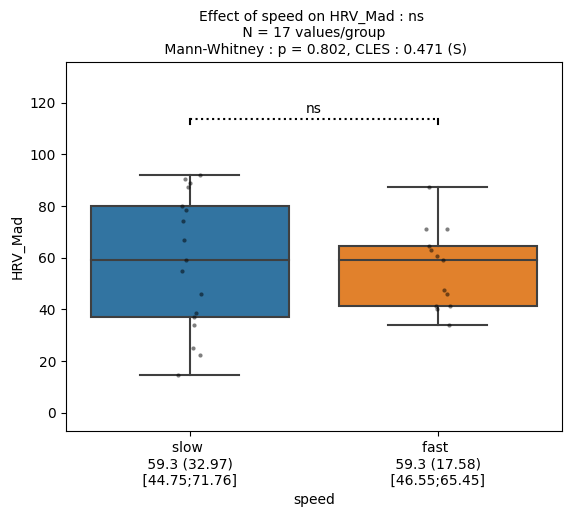

In [119]:
gh.auto_stats(df = hrv, predictor = 'speed', outcome = 'HRV_Mad', design = 'between')

<AxesSubplot: title={'center': 'Effect of speed on HRV_Median : ns \n N = 17 values/group \n t-test_ind : p = 0.053, cohen-d : 0.762 (M)'}, xlabel='speed', ylabel='HRV_Median'>

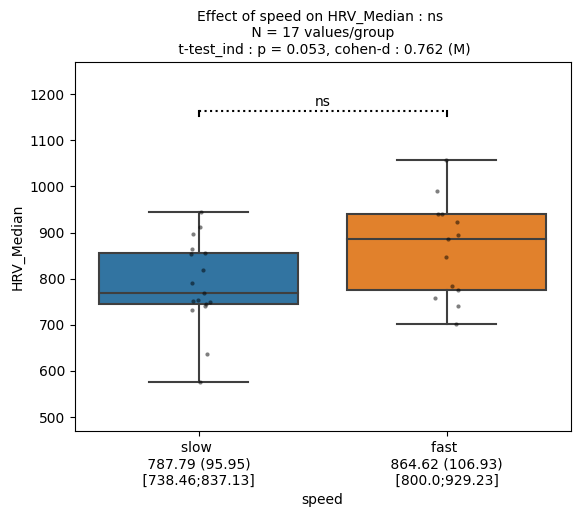

In [121]:
gh.auto_stats(df = hrv, predictor = 'speed', outcome = 'HRV_Median', design = 'between')

# TEMPO ON RSA

In [122]:
rsa = rsa_concat_job.get(global_key).to_dataframe().groupby(['participant','session']).median(True).reset_index()
rsa = rsa.query("session == 'music'")
rsa['tempo'] = rsa['participant'].map(music_features[['participant','tempo']].set_index('participant').to_dict()['tempo'])
rsa['speed'] = rsa['participant'].map(music_features[['participant','speed']].set_index('participant').to_dict()['speed'])
rsa.head(5)

,participant,session,peak_index,trough_index,peak_time,trough_time,peak_value,trough_value,rising_amplitude,decay_amplitude,...,decay_duration,rising_slope,decay_slope,stai_state,stai_trait,Maia_Mean,OAS,BMRQ,tempo,speed
1,P01,music,3016.5,3030.5,301.7140,303.1140,83.910902,80.030339,3.572436,3.586949,...,1.5,2.538447,2.514716,40.0,61.0,1.019643,2.666667,2.727273,81,slow
4,P02,music,2806.0,2822.0,280.6380,282.2380,85.950638,75.508218,9.846101,10.017317,...,2.0,5.363314,5.708185,24.0,37.0,3.354762,3.066667,3.000000,81,slow
7,P03,music,3345.0,3364.0,334.5860,336.4860,85.806562,74.936715,9.560027,9.429559,...,2.1,5.825576,4.664901,20.0,24.0,3.664583,3.266667,3.136364,81,slow
10,P04,music,3002.5,3015.0,300.2745,301.5245,73.395625,68.989958,3.830236,3.925862,...,1.7,3.269927,2.454877,27.0,33.0,3.196429,3.000000,3.227273,110,fast
13,P05,music,2872.0,2899.0,287.2610,289.9610,66.289331,60.483193,5.035702,4.860366,...,2.6,2.116911,2.327392,27.0,21.0,4.107738,3.200000,3.227273,108,fast


<AxesSubplot: title={'center': 'Correlation : -0.132, R² : 0.052, pval : ns'}, xlabel='tempo', ylabel='decay_amplitude'>

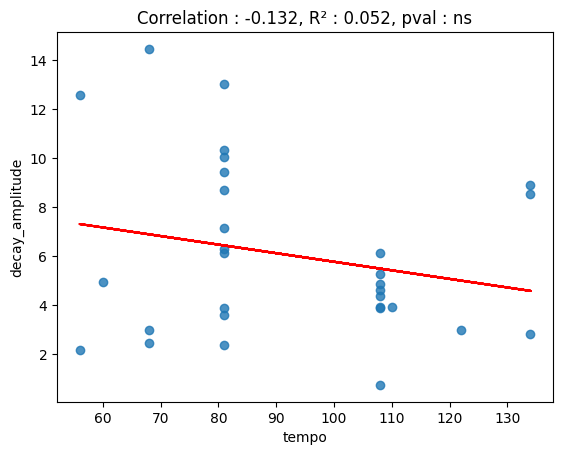

In [93]:
gh.stats_quantitative(df = rsa, xlabel = 'tempo', ylabel = 'decay_amplitude')

<AxesSubplot: title={'center': 'Effect of speed on decay_amplitude : ns \n N = 17 values/group \n Mann-Whitney : p = 0.18, CLES : 0.353 (S)'}, xlabel='speed', ylabel='decay_amplitude'>

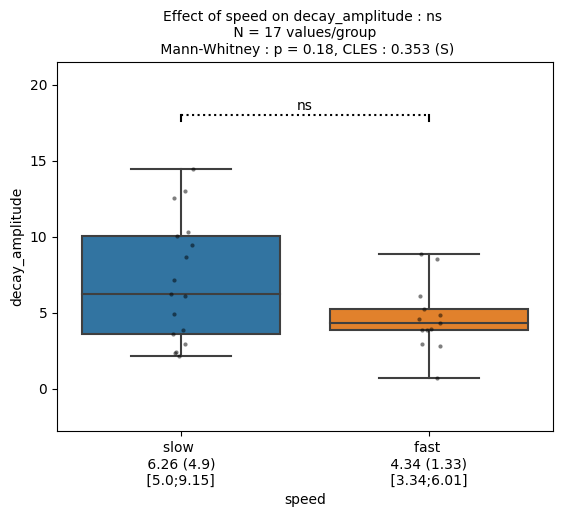

In [123]:
gh.auto_stats(df = rsa, predictor = 'speed', outcome = 'decay_amplitude', design = 'between')

# TEMPO ON PSYCHO

In [125]:
psycho = relaxation_concat_job.get(global_key).to_dataframe()
psycho = psycho.query("session == 'music'")
psycho['tempo'] = psycho['participant'].map(music_features[['participant','tempo']].set_index('participant').to_dict()['tempo'])
psycho['speed'] = psycho['participant'].map(music_features[['participant','speed']].set_index('participant').to_dict()['speed'])

In [96]:
psycho.columns

Index(['participant', 'session', 'stim_name', 'Arousal', 'Relaxation',
       'Relaxation_intensity', 'Perceived_duration', 'stai_state',
       'stai_trait', 'Gender', 'Maia_Mean', 'OAS', 'BMRQ', 'tempo'],
      dtype='object')

<AxesSubplot: >

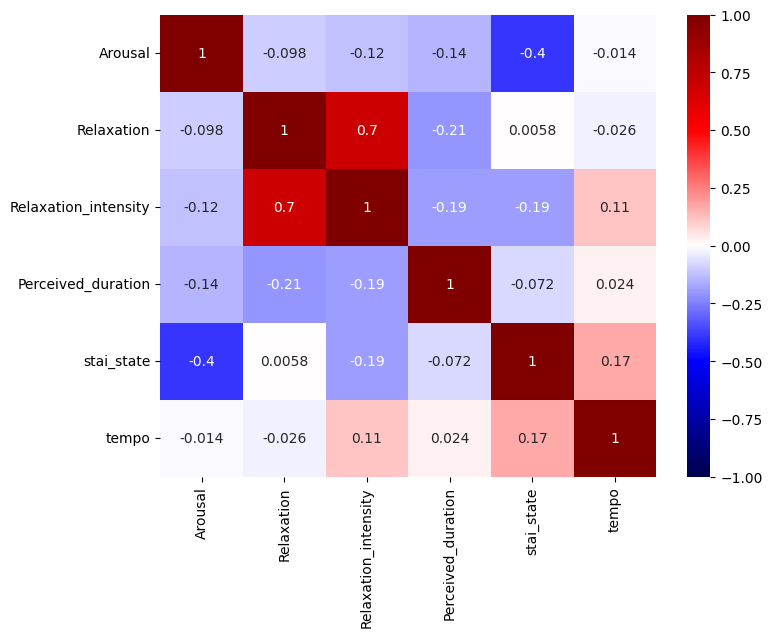

In [99]:
cols = ['Arousal', 'Relaxation',
       'Relaxation_intensity', 'Perceived_duration', 'stai_state','tempo']

fig, ax=  plt.subplots(figsize = (8,6))
sns.heatmap(psycho[cols].corr(numeric_only = True, method = 'spearman'), cmap = 'seismic', annot = True, vmin = -1, vmax = 1, ax=ax)

<AxesSubplot: title={'center': 'Correlation : -0.014, R² : 0.0, pval : ns'}, xlabel='tempo', ylabel='Arousal'>

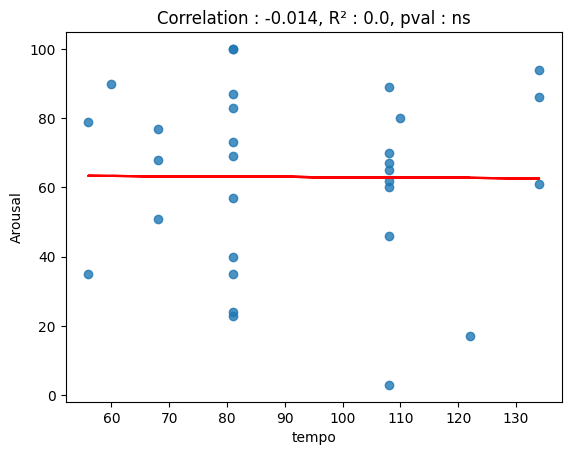

In [101]:
gh.stats_quantitative(df = psycho, xlabel = 'tempo', ylabel = 'Arousal')

<AxesSubplot: title={'center': 'Correlation : 0.111, R² : 0.039, pval : ns'}, xlabel='tempo', ylabel='Relaxation_intensity'>

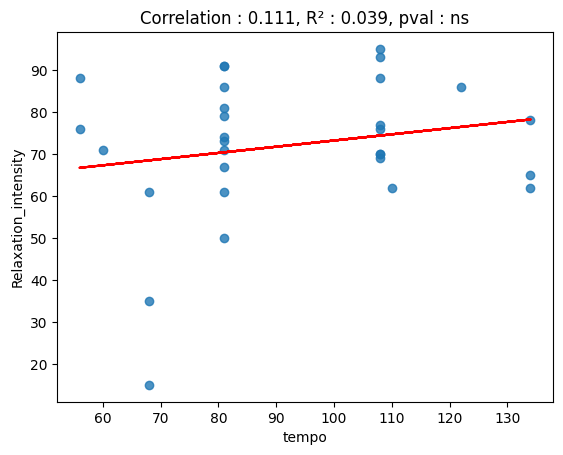

In [102]:
gh.stats_quantitative(df = psycho, xlabel = 'tempo', ylabel = 'Relaxation_intensity')

<AxesSubplot: title={'center': 'Effect of speed on Relaxation_intensity : ns \n N = 17 values/group \n Mann-Whitney : p = 0.489, CLES : 0.577 (M)'}, xlabel='speed', ylabel='Relaxation_intensity'>

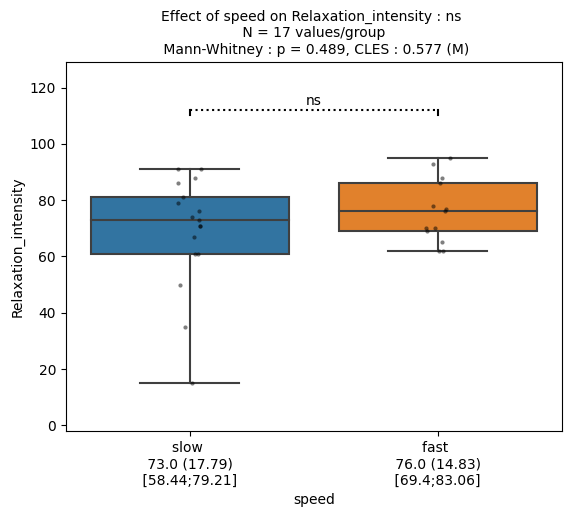

In [126]:
gh.auto_stats(df = psycho, predictor = 'speed', outcome = 'Relaxation_intensity', design = 'between')